In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

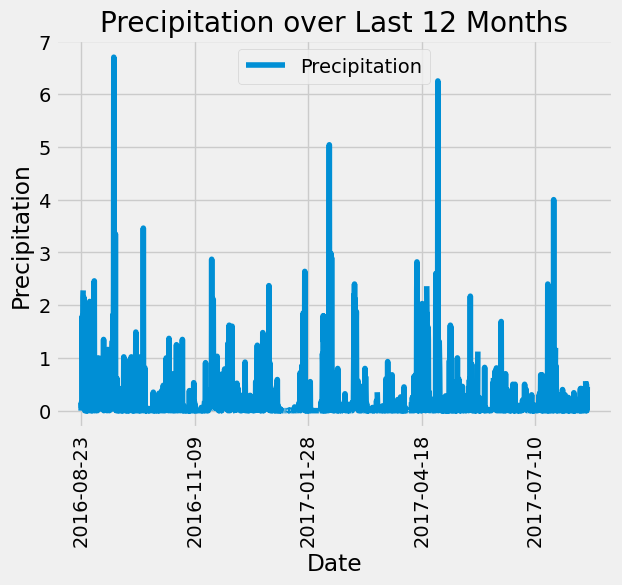

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).order_by(measurement.date).all()

# session.query(measurement.date, measurement.prcp).\
#     filter(measurement.date >= one_year_ago).order_by(measurement.date).count()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()  

# prcp_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation over Last 12 Months')
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(station.station)).all()
stations

[(9,)]

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]
# print(most_active_station_id)

session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

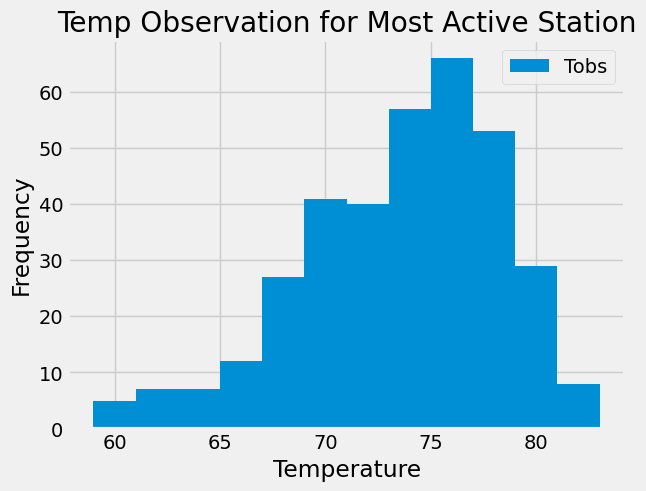

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_scores = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= one_year_ago).filter(measurement.station == most_active_station_id).all()
# tobs_scores

tobs_df = pd.DataFrame(tobs_scores, columns=['Date', 'Tobs'])
# tobs_df.head()

tobs_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Temp Observation for Most Active Station")
plt.show()


# Close Session

In [15]:
# Close Session
session.close()